# Detecting credit card fraud

In this project, I attempt to use multiple classification techniques to help me predict anomolies in a dataset consisting of  anonymized credit card transactions labeled as fraudulent or genuine. 

The goal with this project is to create a reliable method of detecting faudulent transactions with a model. The performance of the our models will be judged based on Accuracy, Precision, Recall and F1-score. We're looking for a model with a high accuracy and F1-score. However, our selection of model would ultimately also be determined by Precision and Recall rates. For example, if the credit card company loses more money through the missed detection of false negatives over false positives then it would make sense to select a model with the higher recall rate everything else being equal.  

Here is a breakdown of each section of the project:

1. Exploratory data analysis (EDA)
2. Data Transformation
3. Modeling (Bootstrap Aggregation, Adaptive Boosting, Decision Trees, Random Forests)
4. Balancing the dataset with SMOTE (Synthetic Minority Over-sampling Technique) 
5. Remodeling
6. Modeling with Neural Networks
7. Post-modeling feature analysis


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Exploratory Data Analysis

In [3]:
df = pd.read_csv('creditcard.csv/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [17]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
non_fraud = len(df[df.Class == 0])
fraud = len(df[df.Class == 1])
fraud_percentage = (fraud / (fraud + non_fraud)) * 100
print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percentage))


Number of Genuine transactions:  284315
Number of Fraud transactions:  492
Percentage of Fraud transactions: 0.1727


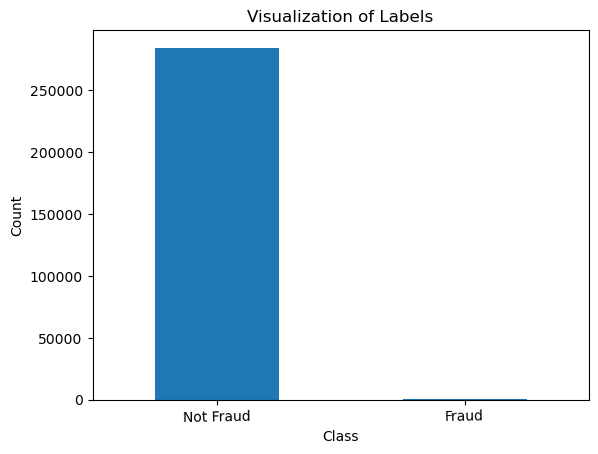

In [13]:
labels = ["Not Fraud", "Fraud"]
count_classes = df.value_counts(df['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 1)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

**Insight**

Over 99.82% are legitimate which indicates that a fraudulent transation will only occur beyond the 3rd standard deviation of results


# Data Transformation 

I scaled the columns “Amount" and "Time” to transform their range of values to something that was easier to work with. I then replaced the original “Amount" and "Time” columns with the new scaled value columns.

In [14]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
df['scaled_amount'] = rs.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rs.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time', 'Amount'], axis=1, inplace=True)
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(0, 'scaled_time', scaled_time)
df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


# Modeling

I utilized the following classification techniques to cluster the data: 
- Bootstrap Aggregation 
- Adaptive Boosting
- Decision Trees 
- Random Forests

In [16]:
#First we'll split up the dataset with a 20% test size

x = df.drop(["Class"], axis= 1)
y = df["Class"]
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size= 0.2, random_state= 1738)
print("Shape of train_X: ", x_train.shape)
print("Shape of test_X: ", x_test.shape)


Shape of train_X:  (227845, 30)
Shape of test_X:  (56962, 30)


In [19]:
#prep work for the modeling

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score

#Creating a function that will allow us to display our statistical measures (accuracy, precision, recall and f1)
def metrics(actuals, predictions):
    print("Accuracy: {:.3f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.3f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.3f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.3f}".format(f1_score(actuals, predictions)))

#Creating a function that allows us to model easily without the need for excessive code
def result (model, x_train, y_train, x_test, y_test):
    x = model()
    x.fit(x_train, y_train)
    y_pred = x.predict(x_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    print()
    metrics(y_test, y_pred.round())
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')


### BaggingClassifier

Bagging, or Bootstrap Aggregating, is an ensemble learning technique that aims to reduce the variance of an estimate. It does this by creating multiple subsets of the original data (with replacement), training a separate model on each subset, and then averaging the predictions (in the case of regression) or taking a majority vote (in the case of classification). Bagging can be used with a variety of base models but is often used with decision trees.


Results from BaggingClassifier

Accuracy: 1.000
Precision: 0.935
Recall: 0.916
F1-score: 0.926


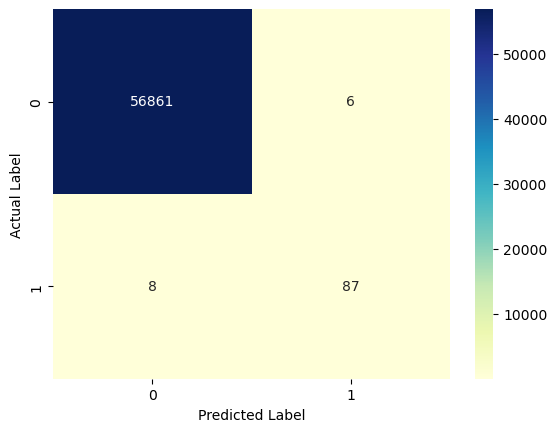

In [20]:
#BaggingClassifier
from sklearn.ensemble import BaggingClassifier
print('Results from BaggingClassifier')

result(BaggingClassifier, x_train, y_train, x_test, y_test)

### AdaBoostClassifier:

AdaBoost, short for "Adaptive Boosting", is a boosting type ensemble learning method. Initially, it assigns equal weights to all the instances (or data points) and aims to classify them correctly. After each round, it increases the weights of the misclassified instances and continues the process. This forces the model to pay more attention to the difficult instances. The final prediction is determined by a weighted vote based on the accuracy of each learner.


Results from AdaBoostClassifier

Accuracy: 0.999
Precision: 0.755
Recall: 0.747
F1-score: 0.751


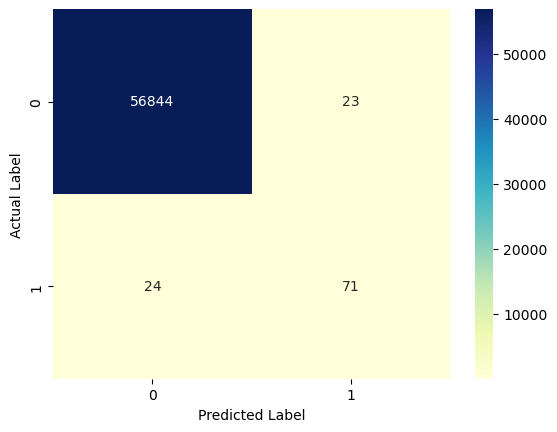

In [21]:
#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
print('Results from AdaBoostClassifier')

result(AdaBoostClassifier, x_train, y_train, x_test, y_test)

### DecisionTreeClassifier: 

A Decision Tree Classifier is a simple yet powerful classification technique. The decision tree builds classification or regression models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time developing an associated decision tree. The final decision tree can explain exactly why a specific prediction was made, making it very attractive for operational use.

Results from DecisionTreeClassifier

Accuracy: 0.999
Precision: 0.789
Recall: 0.905
F1-score: 0.843


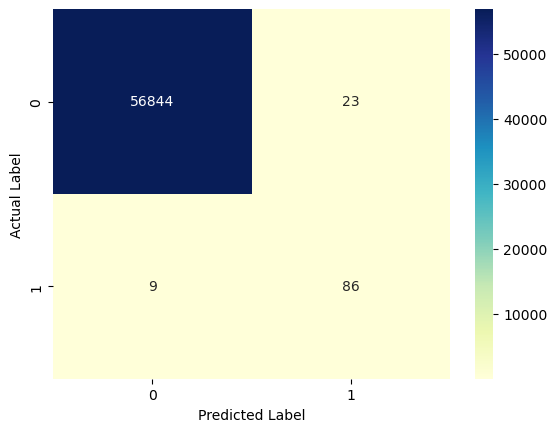

In [22]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
print('Results from DecisionTreeClassifier')

result(DecisionTreeClassifier, x_train, y_train, x_test, y_test)

### RandomForestClassifier: 

A Random Forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. It is a type of ensemble learning method, where a group of weak models combine to form a powerful model. The forest it builds is an ensemble of decision trees, usually trained with the “bagging” method. The main idea of bagging is to average many noisy but approximately unbiased models, and thus reduce the variance. Trees are unpruned and can grow very large with many leaves. Random forests are one of the most robust machine learning algorithms for a variety of data circumstances due to their complexity and flexibility.

Results from RandomForestClassifier

Accuracy: 1.000
Precision: 0.966
Recall: 0.884
F1-score: 0.923


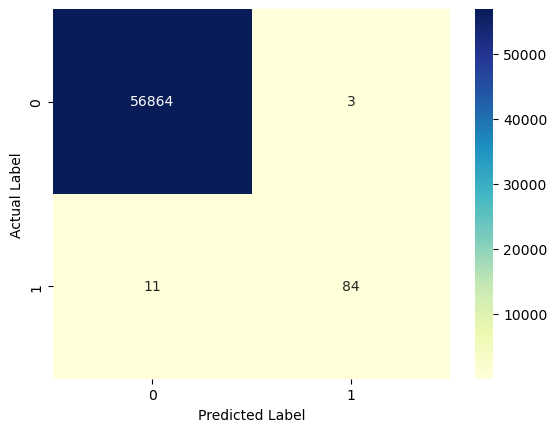

In [23]:
#RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier
print('Results from RandomForestClassifier')

result(RandomForestClassifier, x_train, y_train, x_test, y_test)

**Insights**

Out of the 4 models utilized, the Bagging Classifier and Random Forest Classifier performed the best with a F1-score of 0.926 and 0.923 respectively. The overall performance of both models is relatively similar with the Bagging Classifier having lower precision (more false positives) than the Random Forest Classifier but having a proportionately higher recall rate (less false negatives).

# Improving modeling with SMOTE

SMOTE stands for Synthetic Minority Over-sampling Technique. It's a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases that you supply as input. This is done by:

- Finding the k-nearest-neighbors for minority class observations (finding similar instances)
- Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observation.

SMOTE is an oversampling method. It creates synthetic samples of the minority class, thereby balancing class distribution. It is particularly useful in the case of highly imbalanced datasets, where there's a significant disparity between the number of instances in each class.

The main advantage of SMOTE is that it helps to overcome the overfitting problem that can arise when exact replication of minority instances is used to balance the class distribution. However, it can introduce additional noise as synthetic instances are created without considering the majority class, possibly leading to an increase in false positives.

Before OverSampling, counts of label '1': 397
Before OverSampling, counts of label '0': 227448 

After OverSampling, the shape of train_x: (454896, 30)
After OverSampling, the shape of train_y: (454896,) 

After OverSampling, counts of label '1', %: 50.0
After OverSampling, counts of label '0', %: 50.0


<Axes: xlabel='Class', ylabel='count'>

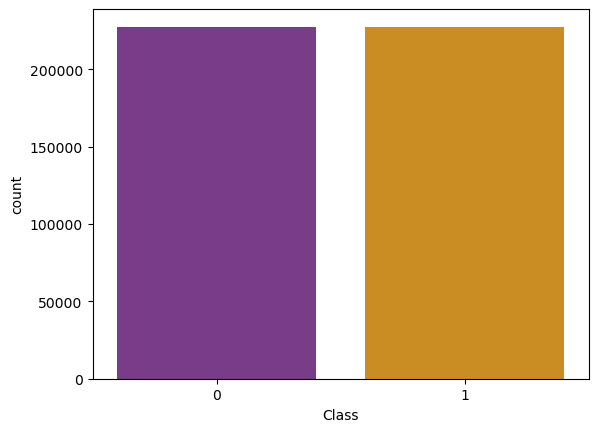

In [25]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=1738)
x_train_s, y_train_s = sm.fit_resample(x_train, y_train)

print('After OverSampling, the shape of train_x: {}'.format(x_train_s.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_s.shape))

print("After OverSampling, counts of label '1', %: {}".format(sum(y_train_s==1)/len(y_train_s)*100.0,2))
print("After OverSampling, counts of label '0', %: {}".format(sum(y_train_s==0)/len(y_train_s)*100.0,2))

sns.countplot(x=y_train_s, data=df, palette='CMRmap')


In [27]:
#New Function for modeling
def result_SMOTE (model, x_train, y_train, x_test, y_test):
    x = model()
    x.fit(x_train, y_train)
    y_pred = x.predict(x_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    print()
    metrics(y_test, y_pred.round())

    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    y_pred_prob = x.predict_proba(x_test)[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    plt.plot(precision, recall)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show()


# Remodeling with SMOTE


Results from BaggingClassifier

Accuracy: 0.999
Precision: 0.746
Recall: 0.895
F1-score: 0.813


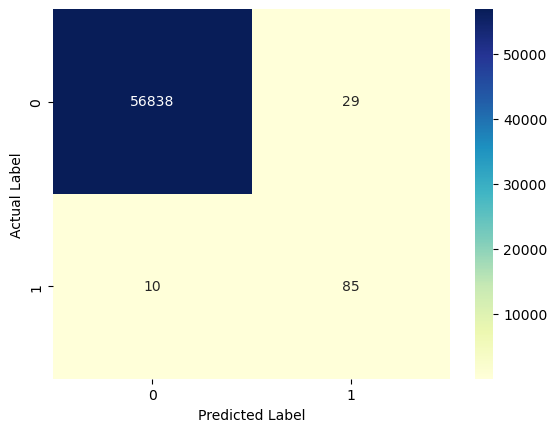

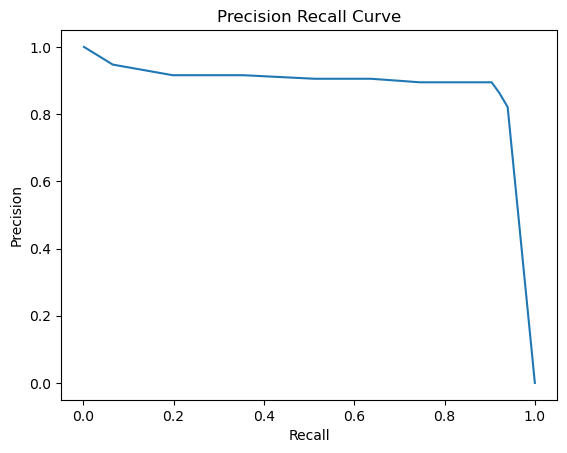

In [29]:
print('Results from BaggingClassifier')
result_SMOTE(BaggingClassifier, x_train_s, y_train_s, x_test, y_test)

Results from AdaBoostClassifier

Accuracy: 0.999
Precision: 0.755
Recall: 0.747
F1-score: 0.751


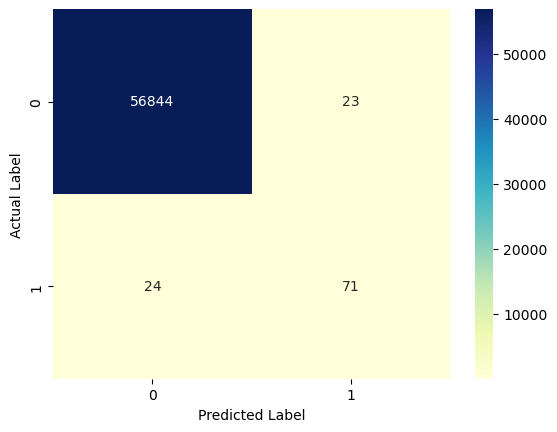

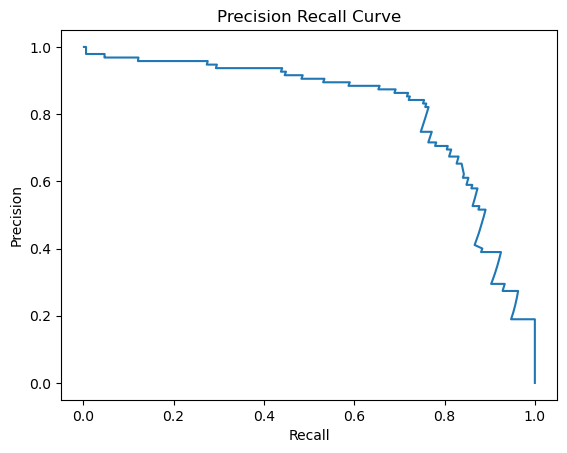

In [31]:
print('Results from AdaBoostClassifier')
result_SMOTE(AdaBoostClassifier, x_train, y_train, x_test, y_test)

Results from DecisionTreeClassifier

Accuracy: 0.998
Precision: 0.411
Recall: 0.895
F1-score: 0.563


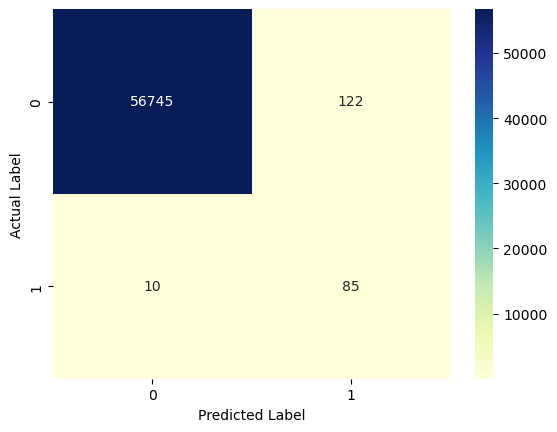

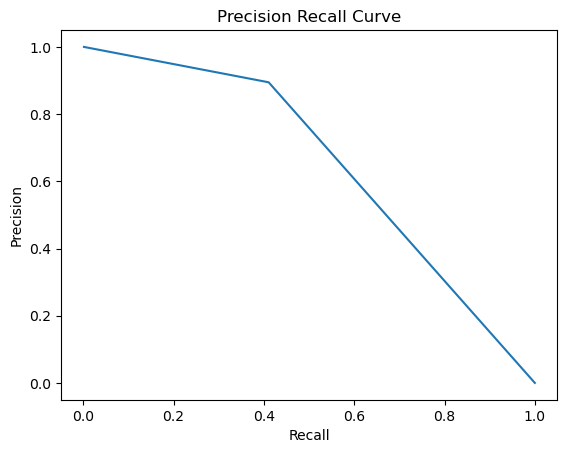

In [33]:
print('Results from DecisionTreeClassifier')
result_SMOTE(DecisionTreeClassifier, x_train_s, y_train_s, x_test, y_test)

Results from RandomForestClassifier

Accuracy: 1.000
Precision: 0.905
Recall: 0.905
F1-score: 0.905


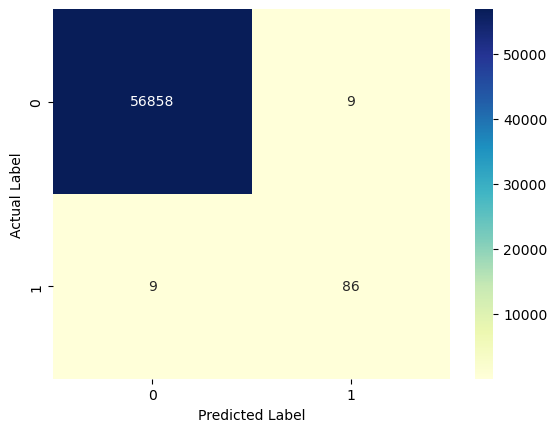

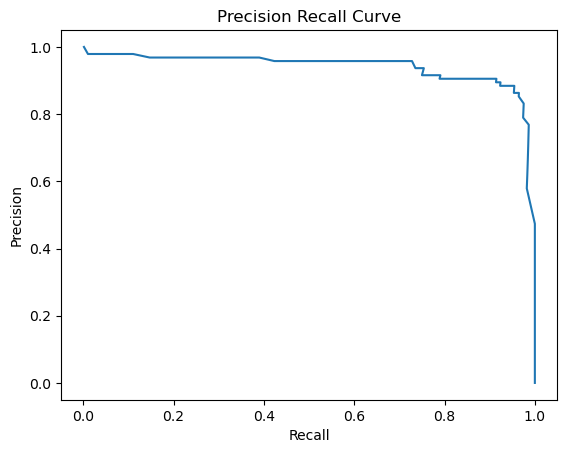

In [36]:
print('Results from RandomForestClassifier')
result_SMOTE(RandomForestClassifier, x_train_s, y_train_s, x_test, y_test)

**Insight**

After applying SMOTE, it was interesting to see that the F1-score (considering both precision and recall) fell significantly for the Bagging Classifier. Additionally, the F1-score also fell for the Random Forest Classifier despite a slight improvement in producing less false negatives. 

At its current state, it would appear that SMOTE hasn't significantly improved our model's ability to predict fraud. The difference between the performance of both the Bagging Classifier and Random Forest Classifier doesn't seem to be too large either, with each model favoring either a higher recall rate (Bagging Classifier) or higher precision (Random Forest Classifier). 

Ultimately, the SMOTE version of the random forest Classifier seems to provide us a more balanced approach producing an equal precision and recall rate. Depending on what costs the credit card company more (either false positives or false negatives), should dictate which model they employ. However, if we wanted to build an even more sophisticated model we can focus on building on top of the Random Forest Classifier with SMOTE. 

Another avenue we haven't explored is the use of Neural Networks which might provide us with more optimal anomoly detection

# Modeling with Neural Networks

The model architecture is sequential, implying that the layers are stacked on top of each other and information flows from the input layer to the output layer without looping back.

The model consists of three layers. The first is the input layer, which has a number of nodes equal to n_inputs, and uses the Rectified Linear Unit (ReLU) activation function. The ReLU function is a popular choice for the hidden layers of a neural network because it helps the model learn complex patterns and avoids the "vanishing gradient" problem that can slow down model training.

The second layer is a hidden layer with 32 nodes, also using the ReLU activation function.

The third layer is the output layer, which consists of 2 nodes corresponding to the two possible output classes in the data. The Softmax activation function is used here, which is commonly used in the output layer of a multi-class classification problem because it outputs a probability distribution over the classes, allowing the model to predict the class with the highest probability.

In [37]:
n_inputs = x_train_s.shape[1]

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')])
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_s, y_train_s, validation_split=0.2, batch_size=300, epochs=30, shuffle=True, verbose=2)


Epoch 1/30
1214/1214 - 4s - loss: 0.0928 - accuracy: 0.9628 - val_loss: 0.0265 - val_accuracy: 0.9947 - 4s/epoch - 3ms/step
Epoch 2/30
1214/1214 - 3s - loss: 0.0176 - accuracy: 0.9958 - val_loss: 0.0191 - val_accuracy: 0.9984 - 3s/epoch - 3ms/step
Epoch 3/30
1214/1214 - 3s - loss: 0.0098 - accuracy: 0.9979 - val_loss: 0.0069 - val_accuracy: 0.9996 - 3s/epoch - 3ms/step
Epoch 4/30
1214/1214 - 3s - loss: 0.0066 - accuracy: 0.9987 - val_loss: 0.0054 - val_accuracy: 0.9999 - 3s/epoch - 2ms/step
Epoch 5/30
1214/1214 - 3s - loss: 0.0050 - accuracy: 0.9990 - val_loss: 0.0038 - val_accuracy: 0.9999 - 3s/epoch - 3ms/step
Epoch 6/30
1214/1214 - 3s - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.0028 - val_accuracy: 0.9999 - 3s/epoch - 3ms/step
Epoch 7/30
1214/1214 - 3s - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0062 - val_accuracy: 0.9985 - 3s/epoch - 3ms/step
Epoch 8/30
1214/1214 - 3s - loss: 0.0028 - accuracy: 0.9995 - val_loss: 6.0883e-04 - val_accuracy: 1.0000 - 3s/epoch - 3ms/step
Epoc

<Axes: >

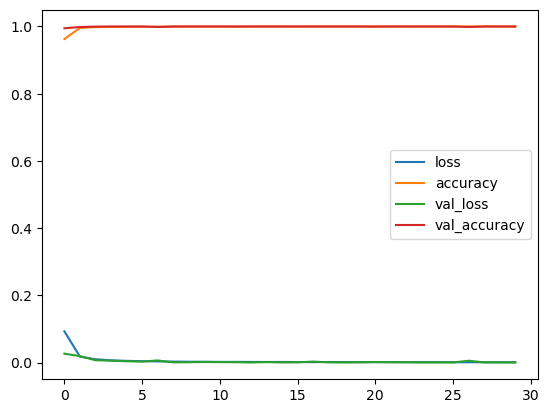

In [40]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()


We aren't getting significantly better results by increasing the number of nodes

In [41]:
score = model.evaluate(x_test, y_test)
print(score)


1781/1781 [==============================] - 3s 2ms/step - loss: 0.0101 - accuracy: 0.9992
[0.01011708751320839, 0.9992275834083557]


1781/1781 [==============================] - 3s 1ms/step
Results from Neural Network
Accuracy: 0.999
Precision: 0.714
Recall: 0.895
F1-score: 0.794


Text(0.5, 23.52222222222222, 'Predicted Label')

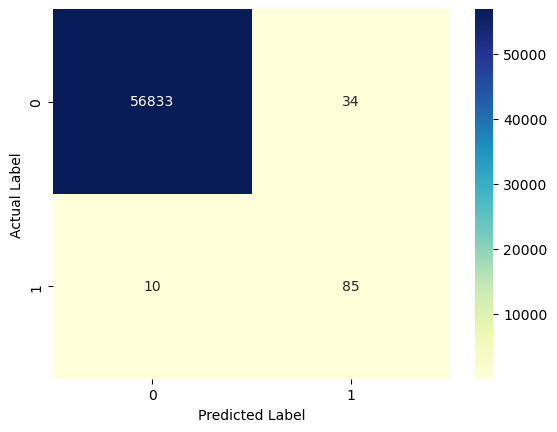

In [42]:
y_pred= np.argmax(model.predict(x_test), axis=-1) 
print('Results from Neural Network')

metrics(y_test, y_pred.round())
nn_f1_score = f1_score(y_test, y_pred)
nn_cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(nn_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')


**insight**

It would appear that our Neural Network was unable to achieve better results than either version of our Bagging Classifier and Random Forest Classifier. I do think that there might be more sophisticated unsupervised learning approaches that we could potentially use. However, for now it would be better to utilize Random Forest or Bagging.

# Post-modeling feature analysis

It might be helpful to analyze which features were the most important considerations for our Random Forest Classifier. Although these features are hidden for confidentiality reasons, I still think its important to identify them so that we can compare and see if our future apporaches take into account the same features as heavily. 



1.V14(0.199603)
2.V10(0.130090)
3.V12(0.116405)
4.V4(0.079546)
5.V11(0.073872)
6.V17(0.066606)
7.V3(0.049426)
8.V16(0.033013)
9.V7(0.032933)
10.V9(0.021207)
11.V8(0.019160)
12.V2(0.017976)
13.V18(0.016557)
14.scaled_amount(0.013781)
15.V6(0.012093)
16.V1(0.010906)
17.V19(0.010748)
18.V21(0.009498)
19.V5(0.009254)
20.V20(0.008847)
21.V13(0.008810)
22.scaled_time(0.008053)
23.V27(0.007826)
24.V26(0.007486)
25.V28(0.007298)
26.V23(0.006375)
27.V15(0.006073)
28.V22(0.005906)
29.V25(0.005842)
30.V24(0.004807)


<BarContainer object of 30 artists>

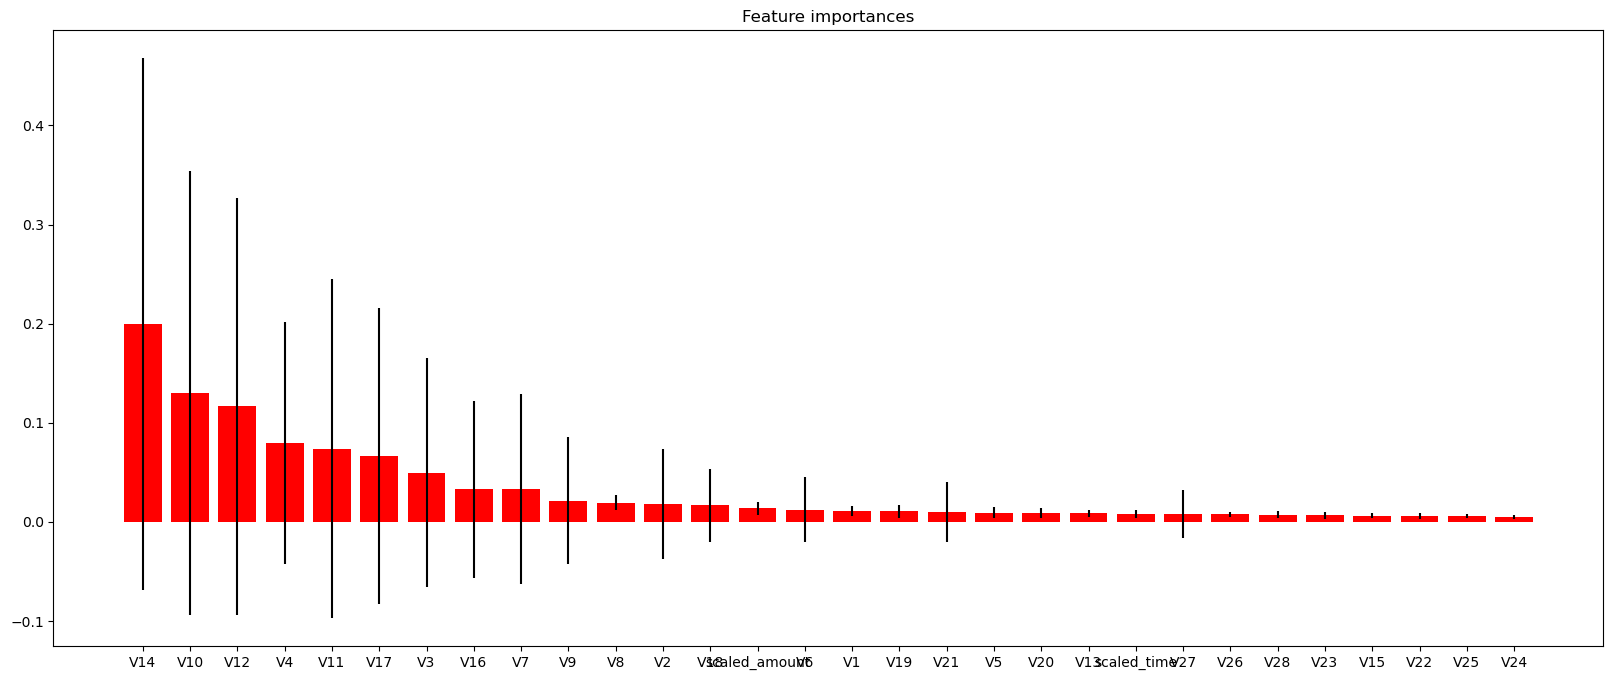

In [45]:
#feature importance
rf= RandomForestClassifier()
rf.fit(x_train_s, y_train_s)
y_pred = rf.predict(x_test)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = df.columns
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))
plt.figure(figsize=(20, 8))
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="red", yerr=std[indices], align='center')


# Key take aways

- By far the most effective anomoly detection methods were the Random Forest Classifier and Bagging Classifier


- SMOTE helped us balance our dataset which helped improve the recall rate of our Random Forest Classifier, but did not improve its overall f1-score and significantly reduced the f1-score for our Bagging Classifier 


- By themselves, the Random Forest and Bagging classifiers are similarly effective at finding outliers with the former approach (Random Forest) having less false positives while the latter (Bagging) approach has less false negatives 


- If we choose to build upon the Random Forest Classifier (e.g. using a gradient boosted approach) then we should note that the factors aranged in order of importance towards the model's prediction are: (V14,V10,V12,V4,V11,V17,V3)

